<a href="https://colab.research.google.com/github/chrisfinan/IDS/blob/main/problem1_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chris Finan

> 10/27/23

> Project 4





###Description:


> In this notebook, I am examining the "adult training" data set. I clean this data set and analyze it using different methods, such as plotting bar charts and histograms as well as using contingency tables. I also analyze the dataset by lowering the range of ages to see if there are any changes. This notebook is coded solely in Python.



In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Use the following dataset about adults: https://github.com/bforoura/IDS/blob/main/HW4/adult_training.csv


> Below I cleaned the data by examining and replacing the noise by imputing the correct average values.



In [56]:
# Pandas read_csv from url

url = "https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv"

adult_training = pd.read_csv(url, sep=",")

In [57]:
# display the entire data frame

adult_training

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


In [58]:
# display info about the dataframe
adult_training.describe()

,age,education,capital-gain,capital-loss
count,14797.000000,14797.000000,14797.000000,14797.000000
mean,38.687437,10.068798,1066.581604,88.580793
std,13.678875,2.598297,7255.455373,406.322208
min,17.000000,1.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000


In [59]:
#Converts the column's 0 values as well as 99999 values (which are most likely errors) to null values so that the the values other than the max can be observed
adult_training['capital-gain'] = adult_training['capital-gain'].replace(0, np.nan)
adult_training['capital-gain'] = adult_training['capital-gain'].replace(99999, np.nan)
adult_training['capital-loss'] = adult_training['capital-loss'].replace(0, np.nan)

In [60]:
# Fill null values in each column with their respective averages
adult_training['capital-gain'].fillna(adult_training['capital-gain'].mean(), inplace=True)
adult_training['capital-loss'].fillna(adult_training['capital-loss'].mean(), inplace=True)

#As you can see now, there are no 0 or 999 values and the data set looks clean based on this summary
#Because there was a lot of noise, some of the values in the summary are the same
adult_training.describe()

,age,education,capital-gain,capital-loss
count,14797.000000,14797.000000,14797.000000,14797.000000
mean,38.687437,10.068798,7637.383491,1877.836676
std,13.678875,2.598297,1600.365217,81.199257
min,17.000000,1.000000,114.000000,213.000000
25%,28.000000,9.000000,7637.383491,1877.836676
50%,37.000000,10.000000,7637.383491,1877.836676
75%,48.000000,12.000000,7637.383491,1877.836676
max,90.000000,16.000000,41310.000000,4356.000000


## 2. Create a contingency table of workclass and sex, and plot it.

In [61]:
#Creates and prints the contingency table
wsTable = pd.crosstab(adult_training['workclass'], adult_training['sex'], margins=False)
wsTable

sex,Female,Male
workclass,,
?,377,452
Federal-gov,149,305
Local-gov,377,592
Never-worked,1,4
Private,3574,6707
Self-emp-inc,54,444
Self-emp-not-inc,178,992
State-gov,201,385
Without-pay,1,4


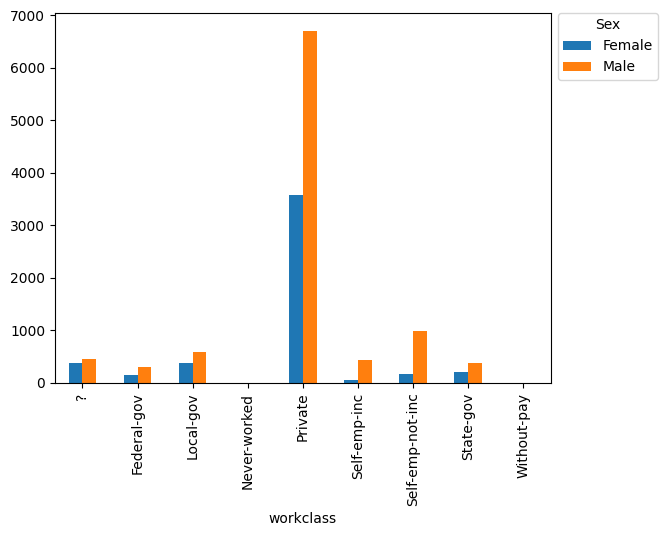

In [62]:
#Plot a bar chart based on the contingency table from above to further visualize the data
ax = wsTable.plot(kind="bar", stacked=False)
ax.legend(title = "Sex", bbox_to_anchor=(1, 1.02), loc='upper left')

As you can see based on the charts above, most of both males and females are privately employed. Almost no one has never worked or been without pay (these 2 are basically the same as they have the same numbers). There are many more men than women that were recorded in this data set as being a part of a specific work class. The values that are the most similar between males and females are unknown (?) and never-worked/without-pay.

## 3. Create a contingency table of sex and marital status, and plot it.

In [63]:
#Creates and prints the contingency table
smTable = pd.crosstab(adult_training['marital-status'], adult_training['sex'], margins=False)
smTable

sex,Female,Male
marital-status,,
Divorced,1219,795
Married-AF-spouse,7,4
Married-civ-spouse,761,6010
Married-spouse-absent,95,104
Never-married,2160,2717
Separated,290,182
Widowed,380,73


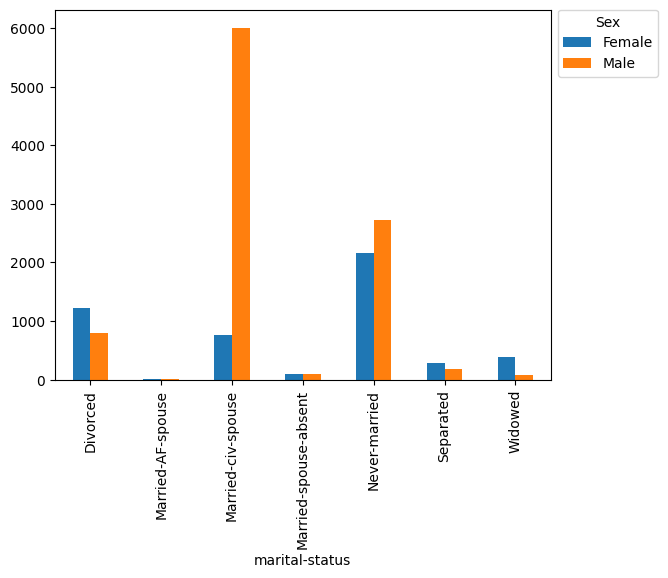

In [64]:
#Plot a bar chart based on the contingency table from above to further visualize the data
ax = smTable.plot(kind="bar", stacked=False)
ax.legend(title = "Sex", bbox_to_anchor=(1, 1.02), loc='upper left')

Most of the different marital statuses are relatively similar, except when it comes to "Married-civ-spouse" where males have over 5,000 more in this category than females. Males also lead in the "Never-married" category by a decent margin and in "Married-spouse-absent" by only 9. However, more females than men are listed as divorced, separated, or widowed. Females also lead in "Married-AF-spouse," but these numbers are so small in general that they are only above males by 3.

## 4. Create a new data frame, adultOver40, for those whose age > 40.

In [65]:
#Make a copy of the cleaned data set
adultOver40 = adult_training.copy()
#Remove all values that are less than 40
adultOver40 = adultOver40[~(adultOver40['age'] < 40)]
#Display the new data frame
adultOver40


,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,7637.383491,1877.836676,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,7637.383491,1877.836676,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,7637.383491,1877.836676,>50K
5,40,Private,11,Married-civ-spouse,Craft-repair,Male,7637.383491,1877.836676,>50K
7,43,Private,7,Married-civ-spouse,Transport-moving,Male,7637.383491,2042.000000,<=50K
...,...,...,...,...,...,...,...,...,...
14787,45,Local-gov,12,Divorced,Prof-specialty,Female,7637.383491,1877.836676,<=50K
14790,65,Self-emp-not-inc,15,Never-married,Prof-specialty,Male,1086.000000,1877.836676,<=50K
14791,43,State-gov,10,Divorced,Adm-clerical,Female,7637.383491,1877.836676,<=50K
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,7637.383491,1877.836676,<=50K


## 5. Recreate the contingency table of sex and marital status for adultOver40.

In [66]:
#Creates and prints the contingency table
smTable2 = pd.crosstab(adultOver40['marital-status'], adultOver40['sex'], margins=False)
smTable2

sex,Female,Male
marital-status,,
Divorced,769,476
Married-AF-spouse,0,1
Married-civ-spouse,332,3554
Married-spouse-absent,41,50
Never-married,290,342
Separated,147,81
Widowed,356,71


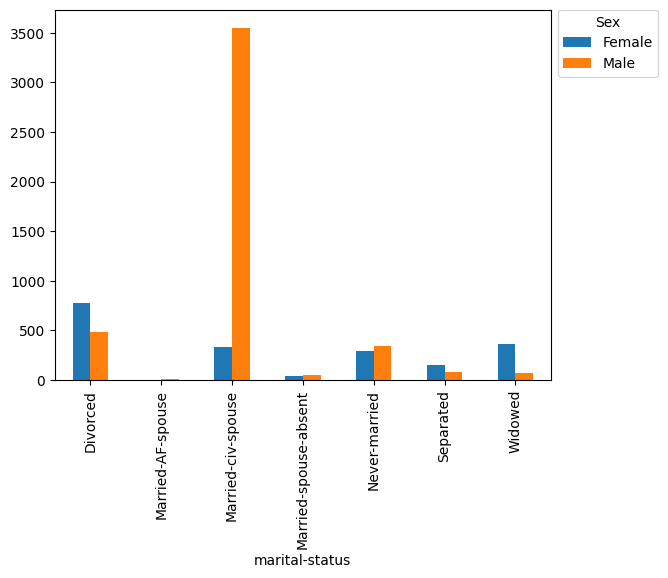

In [67]:
#Plot a bar chart based on the contingency table from above to further visualize the data
ax = smTable2.plot(kind="bar", stacked=False)
ax.legend(title = "Sex", bbox_to_anchor=(1, 1.02), loc='upper left')

Even though the sample size is smaller than before, with only people over 40, the proportions between male and female are still relatively the same for marital status. Males are still ahead in "Married-civ-spouse" by a substantial margin. The gap between males and females is closer for "Never-married," but males still have more. The difference between males and females for "Married-spouse-absent" is exactly 9 again with males having more. Females are still leading in divorced, separated and widowed. The one difference is that males now have more than females in "Married-AF-spouse" even though the overall numbers are very small (1 vs 0).

## 6. Determine whether any outliers exist for the education field.

In [68]:
adult_training['education'].describe()

count    14797.000000
mean        10.068798
std          2.598297
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education, dtype: float64

In [69]:
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler

In [70]:
#Initialize the scaler
stdScaler = StandardScaler()
#Scale and reshape education
education_scaled = pd.DataFrame(stdScaler.fit_transform(np.array(adult_training['education'].values.reshape(-1,1))), columns=['education'])

adult_training['education_scaled'] = stdScaler.fit_transform(adult_training[["education"]])
m1 = adult_training['education_scaled'].mean()
print("The new shifted mean: %6.6f" % (m1))

education_outliers = adult_training.query('(education_scaled > 3) | (education_scaled < -3)')
#print how many outliers are there:
print("number of outliers in education =", len(education_outliers))



The new shifted mean: -0.000000
number of outliers in education = 113


In [71]:
#Display the new scaled education data frame
adult_training['education_scaled'].describe()

count    1.479700e+04
mean    -1.920775e-17
std      1.000034e+00
min     -3.490403e+00
25%     -4.113594e-01
50%     -2.647890e-02
75%      7.432821e-01
max      2.282804e+00
Name: education_scaled, dtype: float64

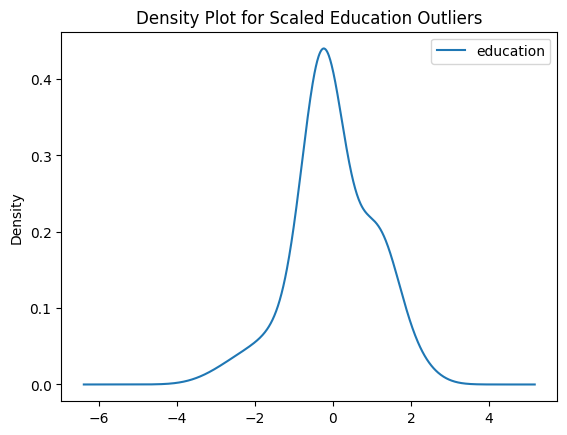

In [72]:
#Plots a smoothed down density curve of the education scaled to further visualize the outliers in this column
education_scaled.plot.kde(bw_method=0.5)
plt.title('Density Plot for Scaled Education Outliers')
plt.show()


First I displayed the original education data, then I scaled it to determine the outliers. I concluded that there are a total of 113 outliers out of 14797 values in education. Displaying the count of outliers, the described table, and the density curve allow the viewer to visualize the few outliers that appear in "eduation."

## 7. Standardize (zero mean) the age variable, and identify how many outliers there are. What is the most extreme outlier?

In [73]:
adult_training['age'].describe()

count    14797.000000
mean        38.687437
std         13.678875
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [74]:
#Scale and reshape age
age_scaled = pd.DataFrame(stdScaler.fit_transform(np.array(adult_training['age'].values.reshape(-1,1))), columns=['age'])

adult_training['age_scaled'] = stdScaler.fit_transform(adult_training[["age"]])
m1 = adult_training['age_scaled'].mean()
print("The new shifted mean: %6.6f" % (m1))

age_outliers = adult_training.query('(age_scaled > 3) | (age_scaled < -3)')
#print how many outliers are there:
print("number of outliers in age =", len(age_outliers))

The new shifted mean: 0.000000
number of outliers in age = 60


In [75]:
#Display the new scaled age data frame
adult_training['age_scaled'].describe()

count    1.479700e+04
mean     9.651895e-17
std      1.000034e+00
min     -1.585523e+00
25%     -7.813360e-01
50%     -1.233649e-01
75%      6.808219e-01
max      3.751354e+00
Name: age_scaled, dtype: float64

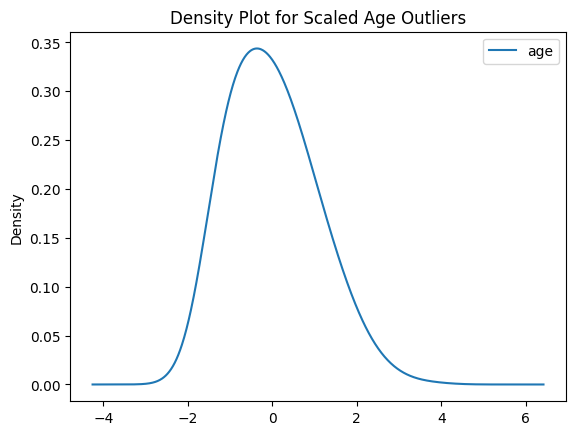

In [76]:
#Plots a smoothed down density curve of the age scaled to further visualize the outliers in this column
age_scaled.plot.kde(bw_method=0.5)
plt.title('Density Plot for Scaled Age Outliers')
plt.show()

To determine the outliers, I went through the same process I did as education.The graphs and tables visualize the data where there is a total of 60 outliers.The most extreme outlier is the maximum value, which is 90. This value checks all the boxes of being an outlier through the steps I went through above and it is the most extreme because it is the farthest away from any of the quartiles (specifically Q3). The max is > 3 which classifies it as an outlier and you can see right before +4 that the density curve has not fully flattened out yet.

## 8. Age anomaly? Select only records with age at least 80, and construct a histogram of age. Explain what you see.

In [77]:
#Make a copy of the cleaned data set
atLeast80 = adult_training.copy()
#Remove all values that are less than 80
atLeast80 = atLeast80[~(atLeast80['age'] < 80)]
#Display the new data frame
atLeast80

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,education_scaled,age_scaled
99,90,Private,9,Never-married,Other-service,Male,7637.383491,2206.000000,<=50K,-0.411359,3.751354
204,80,?,9,Widowed,?,Male,7637.383491,1877.836676,<=50K,-0.411359,3.020275
492,90,Private,9,Never-married,Other-service,Female,7637.383491,1877.836676,<=50K,-0.411359,3.751354
552,88,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,Male,7637.383491,1877.836676,<=50K,1.897924,3.605138
885,90,Private,13,Married-civ-spouse,Exec-managerial,Male,7637.383491,1877.836676,<=50K,1.128163,3.751354
1066,90,Private,10,Never-married,Other-service,Male,7637.383491,1877.836676,<=50K,-0.026479,3.751354
1485,82,?,4,Widowed,?,Male,7637.383491,1877.836676,<=50K,-2.335762,3.166491
2420,90,Private,5,Never-married,Adm-clerical,Female,7637.383491,1877.836676,<=50K,-1.950881,3.751354
2430,80,Private,14,Widowed,Prof-specialty,Female,7637.383491,1877.836676,<=50K,1.513043,3.020275
2467,90,Local-gov,14,Married-civ-spouse,Exec-managerial,Male,20051.000000,1877.836676,>50K,1.513043,3.751354


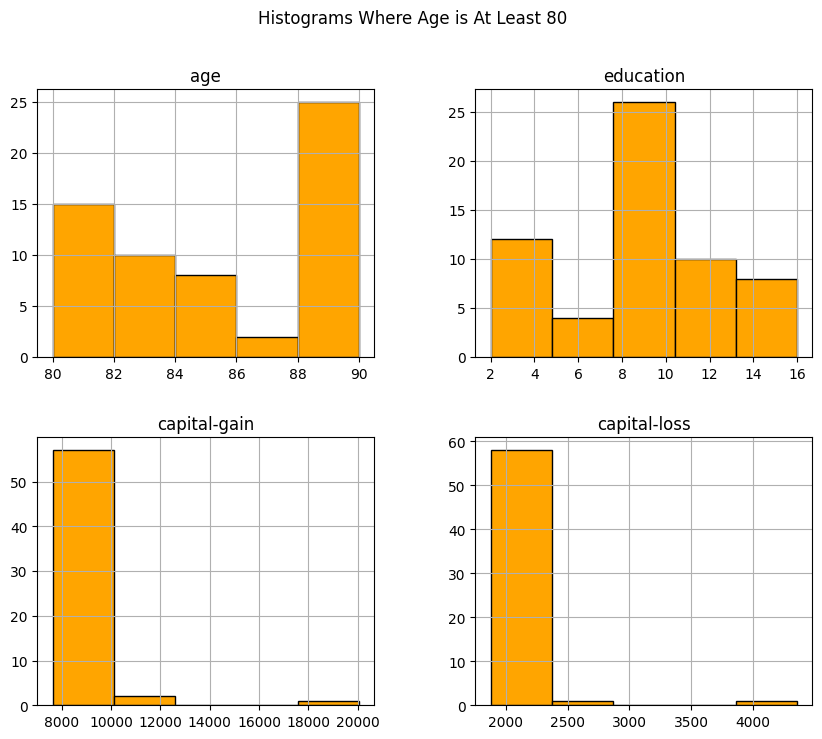

In [78]:
#Plot each quantitative variable as a histogram for the ages of 80 and up
#There is no need to include the scaled columns from previous problems
atLeast80[['age', 'education', 'capital-gain', 'capital-loss']].hist(bins=5, edgecolor='black', color='orange', figsize=(10, 8))

plt.suptitle('Histograms Where Age is At Least 80')
plt.show()

The one thing that I noticed in the histograms for those who are the age of 80 or older is that there tends to be one section that occurs much more frequently than the others for each chart. The ages between 88 and 90 take up about 25% of this data set. The next values are 15%. For 'education,' the values between about 8 to 10 occur over 25% of the time as well. The next values are about 12%. For 'capital-gain' the values between about 8000 to 10000 occur almost 60% of the time. 'Capital-loss' also takes up almost 60% with the values between about 1500 and 2300. The percentages for all of the other value ranges for both 'capital-gain' and 'capital-loss' do not individually add up to more than 5%. The reason for so many of the capital gain and loss values being in the same range could be due to the fact that many of their values were originally missing or incorrect and needed to be imputed as the average.

## 9. Summarize your findings.


- I originally discovered that there was some issues with the values in the data set. I had to clean the data set of any noise and impute the necessary averages to make sure all of the inputs were valid.
- When taking a look at sex vs workclass, I noticed that many more males than females were recorded in this data set. Males were higher in almost every work class by a substantial margin. The ones labeled ?,' 'never-worked,' and 'without-pay' were the closest between the sexes.
- When comparing sexes to marital status, I noticed that females were higher than males in 'divorced,' 'separated,' and 'widowed.' For 'married-civ-spouse,' males had a much larger margin over females. Other than that, the values between the sexes were much more negligible.
- When lowering the range to people over 40, the ratios mostly stayed the same between males and females. The one difference is that males had more than females in "Married-AF-spouse" even though the overall numbers are very small (1 vs 0).
- I found that there were 113 outliers in the 'education' column by scaled the data and using the 3-sigma rule. I used the same methods to discover that there were 60 outliers in the 'age' column. The most extreme age outlier is 90.
- When taking a look at the data set for people who are at least 80 years old, I noticed that there was a trend where a few values in a range would appear much more than the rest of the values. Many of the values were also the same due to imputing in the beginning.
- Python has simpler syntax than R when it comes to some graphs as well as dataframe operations


### Sources
- https://github.com/bforoura/IDS/blob/main/Portuguese_Bank_Python.ipynb
- https://github.com/bforoura/IDS/blob/main/HW4/adult_training.csv